In [1]:
# Import necessary modules
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in data
data = pd.read_csv('student.csv')
pd.set_option('display.max_columns',80)

# Check for null values
data.isna().sum()
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Test scores: 0.8681302060905317


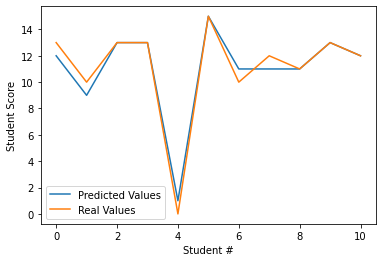

In [3]:
# Seperating numerical and object data types
numerical_categories = []
object_categories = []
for category in data:
    if data[category].dtype == 'int64':
        numerical_categories.append(category)
    else:
        object_categories.append(category)
numerical_categories.pop()


# Setting numerical values into feature matrix, and setting target vector
X = data[numerical_categories]
y = data.G3



# Splitting data, fitting model, with numerical categories, before making use of categorical data and feature selection
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=5)
linreg.fit(X_train, y_train)
prediction = linreg.predict(X_test)
prediction = prediction.astype(int)

# Checking R2 score to see how accurate the model is
print(f'Test scores: {linreg.score(X_test, y_test)}')
y_test = y_test.tolist()

# Plotting chart to visualize predicted value vs test set
plt.xlabel('Student #')
plt.ylabel('Student Score')
plt.plot(prediction[0:11], label='Predicted Values')
plt.plot(y_test[0:11], label='Real Values')
plt.legend()
plt.show()

In [4]:
# Converting categorical data into binary values
data = pd.get_dummies(data, columns=object_categories)

# Setting feature matrix and target vector
y = data.G3
X = data.drop('G3',1)

In [5]:
# Using linear support vector regression, making use of L1 regularization
lsvr = LinearSVR(C=0.01, tol=1e-5, max_iter=10000).fit(X,y)
model = SelectFromModel(lsvr, prefit=True)
X_new = model.transform(X)

# Getting selected feature names from feature selection model
feature_name = X.columns[model.get_support()]

In [6]:
# Display new dataframe, with selected features
pd.DataFrame(data=X_new, columns=feature_name)

,age,traveltime,failures,famrel,Dalc,G1,G2,Mjob_at_home,Mjob_teacher,Fjob_at_home,Fjob_other,Fjob_services,reason_other,schoolsup_no,schoolsup_yes,higher_no,higher_yes
0,18,2,0,4,1,0,11,1,0,0,0,0,0,0,1,0,1
1,17,1,0,5,1,9,11,1,0,0,1,0,0,1,0,0,1
2,15,1,0,4,2,12,13,1,0,0,1,0,1,0,1,0,1
3,15,1,0,3,1,14,14,0,0,0,0,1,0,1,0,0,1
4,16,1,0,4,1,11,13,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,1,1,5,1,10,11,0,0,0,1,0,0,1,0,0,1
645,18,1,0,4,1,15,15,0,1,0,0,1,0,1,0,0,1
646,18,2,0,1,1,11,12,0,0,0,1,0,0,1,0,0,1
647,17,2,0,2,3,10,10,0,0,0,0,1,0,1,0,0,1


In [7]:
# Train, test, split and fit on selected data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=.2, random_state=5)
linreg.fit(X_train, y_train)

LinearRegression()

Test scores: 0.8727013825910075


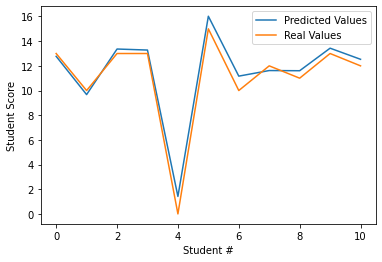

In [8]:
prediction = prediction.astype(int)
y_test = y_test.tolist()
prediction = linreg.predict(X_test)
print(f'Test scores: {linreg.score(X_test, y_test)}')

# Plotting data from dataset that has been created with feature selection and usage of categorial data
plt.xlabel('Student #')
plt.ylabel('Student Score')
plt.plot(prediction[0:11], label='Predicted Values')
plt.plot(y_test[0:11], label='Real Values')
plt.legend()
plt.show()